In [452]:
import pandas as pd
import numpy as np

In [453]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [454]:
%%bigquery --project pg835011 df

WITH iemv AS (SELECT * FROM `physionet-data.mimiciii_clinical.inputevents_mv` WHERE PATIENTWEIGHT > 83.6 ORDER BY PATIENTWEIGHT DESC)

SELECT iemv.ROW_ID, pts.SUBJECT_ID, pts.GENDER, pts.DOB,iemv.HADM_ID,iemv.PATIENTWEIGHT,adm.DIAGNOSIS,adm.ADMITTIME, adm.DISCHTIME , adm.ADMISSION_LOCATION, 
adm.DEATHTIME, adm.DISCHARGE_LOCATION, adm.INSURANCE, adm.RELIGION, adm.MARITAL_STATUS,adm.ETHNICITY, adm.EDOUTTIME, 

FROM iemv 
INNER JOIN `physionet-data.mimiciii_clinical.patients` AS pts ON iemv.SUBJECT_ID = pts.SUBJECT_ID
INNER JOIN `physionet-data.mimiciii_clinical.admissions` AS adm ON iemv.SUBJECT_ID = adm.SUBJECT_ID 

WHERE adm.DIAGNOSIS = 'CHEST PAIN'
OR adm.DIAGNOSIS = 'CARDIAC ARREST'
OR adm.DIAGNOSIS = 'MYOCARDIAL INFARCTION'
OR adm.DIAGNOSIS = 'STROKE'

ORDER BY (PATIENTWEIGHT) DESC

In [455]:
df.head()

,ROW_ID,SUBJECT_ID,GENDER,DOB,HADM_ID,PATIENTWEIGHT,DIAGNOSIS,ADMITTIME,DISCHTIME,ADMISSION_LOCATION,DEATHTIME,DISCHARGE_LOCATION,INSURANCE,RELIGION,MARITAL_STATUS,ETHNICITY,EDOUTTIME
0,1997208,74821,M,2108-04-25,146804,1370.0,CHEST PAIN,2141-09-29 15:25:00,2141-10-04 10:30:00,CLINIC REFERRAL/PREMATURE,NaT,REHAB/DISTINCT PART HOSP,Private,CATHOLIC,MARRIED,WHITE,2141-09-29 16:32:00
1,1997215,74821,M,2108-04-25,146804,1370.0,CHEST PAIN,2141-09-29 15:25:00,2141-10-04 10:30:00,CLINIC REFERRAL/PREMATURE,NaT,REHAB/DISTINCT PART HOSP,Private,CATHOLIC,MARRIED,WHITE,2141-09-29 16:32:00
2,1997213,74821,M,2108-04-25,146804,1370.0,CHEST PAIN,2141-09-29 15:25:00,2141-10-04 10:30:00,CLINIC REFERRAL/PREMATURE,NaT,REHAB/DISTINCT PART HOSP,Private,CATHOLIC,MARRIED,WHITE,2141-09-29 16:32:00
3,1997209,74821,M,2108-04-25,146804,1370.0,CHEST PAIN,2141-09-29 15:25:00,2141-10-04 10:30:00,CLINIC REFERRAL/PREMATURE,NaT,REHAB/DISTINCT PART HOSP,Private,CATHOLIC,MARRIED,WHITE,2141-09-29 16:32:00
4,1997212,74821,M,2108-04-25,146804,1370.0,CHEST PAIN,2141-09-29 15:25:00,2141-10-04 10:30:00,CLINIC REFERRAL/PREMATURE,NaT,REHAB/DISTINCT PART HOSP,Private,CATHOLIC,MARRIED,WHITE,2141-09-29 16:32:00


In [456]:
df.columns

Index(['ROW_ID', 'SUBJECT_ID', 'GENDER', 'DOB', 'HADM_ID', 'PATIENTWEIGHT',
       'DIAGNOSIS', 'ADMITTIME', 'DISCHTIME', 'ADMISSION_LOCATION',
       'DEATHTIME', 'DISCHARGE_LOCATION', 'INSURANCE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'EDOUTTIME'],
      dtype='object')

In [457]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60578 entries, 0 to 60577
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ROW_ID              60578 non-null  int64         
 1   SUBJECT_ID          60578 non-null  int64         
 2   GENDER              60578 non-null  object        
 3   DOB                 60578 non-null  datetime64[ns]
 4   HADM_ID             60578 non-null  int64         
 5   PATIENTWEIGHT       60578 non-null  float64       
 6   DIAGNOSIS           60578 non-null  object        
 7   ADMITTIME           60578 non-null  datetime64[ns]
 8   DISCHTIME           60578 non-null  datetime64[ns]
 9   ADMISSION_LOCATION  60578 non-null  object        
 10  DEATHTIME           9567 non-null   datetime64[ns]
 11  DISCHARGE_LOCATION  60578 non-null  object        
 12  INSURANCE           60578 non-null  object        
 13  RELIGION            60578 non-null  object    

In [458]:
df.isna().sum()

ROW_ID                    0
SUBJECT_ID                0
GENDER                    0
DOB                       0
HADM_ID                   0
PATIENTWEIGHT             0
DIAGNOSIS                 0
ADMITTIME                 0
DISCHTIME                 0
ADMISSION_LOCATION        0
DEATHTIME             51011
DISCHARGE_LOCATION        0
INSURANCE                 0
RELIGION                  0
MARITAL_STATUS         1719
ETHNICITY                 0
EDOUTTIME              6194
dtype: int64

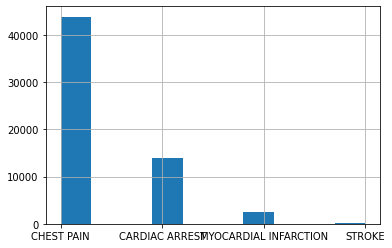

In [459]:
df['DIAGNOSIS'].hist()

In [460]:
df.head()

,ROW_ID,SUBJECT_ID,GENDER,DOB,HADM_ID,PATIENTWEIGHT,DIAGNOSIS,ADMITTIME,DISCHTIME,ADMISSION_LOCATION,DEATHTIME,DISCHARGE_LOCATION,INSURANCE,RELIGION,MARITAL_STATUS,ETHNICITY,EDOUTTIME
0,1997208,74821,M,2108-04-25,146804,1370.0,CHEST PAIN,2141-09-29 15:25:00,2141-10-04 10:30:00,CLINIC REFERRAL/PREMATURE,NaT,REHAB/DISTINCT PART HOSP,Private,CATHOLIC,MARRIED,WHITE,2141-09-29 16:32:00
1,1997215,74821,M,2108-04-25,146804,1370.0,CHEST PAIN,2141-09-29 15:25:00,2141-10-04 10:30:00,CLINIC REFERRAL/PREMATURE,NaT,REHAB/DISTINCT PART HOSP,Private,CATHOLIC,MARRIED,WHITE,2141-09-29 16:32:00
2,1997213,74821,M,2108-04-25,146804,1370.0,CHEST PAIN,2141-09-29 15:25:00,2141-10-04 10:30:00,CLINIC REFERRAL/PREMATURE,NaT,REHAB/DISTINCT PART HOSP,Private,CATHOLIC,MARRIED,WHITE,2141-09-29 16:32:00
3,1997209,74821,M,2108-04-25,146804,1370.0,CHEST PAIN,2141-09-29 15:25:00,2141-10-04 10:30:00,CLINIC REFERRAL/PREMATURE,NaT,REHAB/DISTINCT PART HOSP,Private,CATHOLIC,MARRIED,WHITE,2141-09-29 16:32:00
4,1997212,74821,M,2108-04-25,146804,1370.0,CHEST PAIN,2141-09-29 15:25:00,2141-10-04 10:30:00,CLINIC REFERRAL/PREMATURE,NaT,REHAB/DISTINCT PART HOSP,Private,CATHOLIC,MARRIED,WHITE,2141-09-29 16:32:00


In [461]:
df['AGE'] = df['ADMITTIME'].sub(df['DOB']) // np.timedelta64(1,'Y')
df['AGE']

0        33
1        33
2        33
3        33
4        33
         ..
60573    80
60574    80
60575    80
60576    80
60577    80
Name: AGE, Length: 60578, dtype: int64

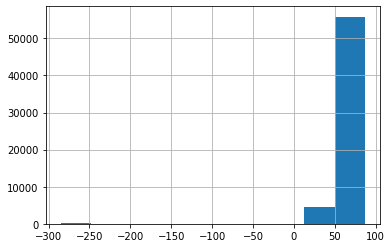

In [462]:
df['AGE'].hist()

In [463]:
df.shape[0]

60578

In [464]:
df.count()

ROW_ID                60578
SUBJECT_ID            60578
GENDER                60578
DOB                   60578
HADM_ID               60578
PATIENTWEIGHT         60578
DIAGNOSIS             60578
ADMITTIME             60578
DISCHTIME             60578
ADMISSION_LOCATION    60578
DEATHTIME              9567
DISCHARGE_LOCATION    60578
INSURANCE             60578
RELIGION              60578
MARITAL_STATUS        58859
ETHNICITY             60578
EDOUTTIME             54384
AGE                   60578
dtype: int64

In [465]:
df.groupby('SUBJECT_ID').count()

,ROW_ID,GENDER,DOB,HADM_ID,PATIENTWEIGHT,DIAGNOSIS,ADMITTIME,DISCHTIME,ADMISSION_LOCATION,DEATHTIME,DISCHARGE_LOCATION,INSURANCE,RELIGION,MARITAL_STATUS,ETHNICITY,EDOUTTIME,AGE
SUBJECT_ID,,,,,,,,,,,,,,,,,
835,20,20,20,20,20,20,20,20,20,0,20,20,20,20,20,20,20
902,79,79,79,79,79,79,79,79,79,0,79,79,79,79,79,0,79
1018,30,30,30,30,30,30,30,30,30,0,30,30,30,30,30,30,30
1354,184,184,184,184,184,184,184,184,184,0,184,184,184,184,184,0,184
1986,6,6,6,6,6,6,6,6,6,0,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97818,27,27,27,27,27,27,27,27,27,0,27,27,27,27,27,27,27
98046,522,522,522,522,522,522,522,522,522,0,522,522,522,522,522,522,522
98664,262,262,262,262,262,262,262,262,262,0,262,262,262,262,262,262,262


In [466]:
df['PATIENTWEIGHT'].value_counts()

85.9     3588
90.0     3088
100.0    2432
84.1     2408
98.0     2056
         ... 
146.0       1
130.0       1
177.0       1
143.9       1
240.0       1
Name: PATIENTWEIGHT, Length: 203, dtype: int64

In [467]:
df['DIAGNOSIS'].value_counts()

CHEST PAIN               43813
CARDIAC ARREST           13989
MYOCARDIAL INFARCTION     2535
STROKE                     241
Name: DIAGNOSIS, dtype: int64

In [468]:
df['DEATHTIME'].value_counts(dropna = False)

NaT                    51011
2127-08-07 21:15:00     1646
2174-09-21 12:00:00     1020
2180-04-04 14:10:00      875
2141-04-05 14:00:00      862
2191-07-26 14:50:00      608
2151-04-10 03:00:00      502
2174-07-01 16:45:00      476
2161-11-13 15:13:00      451
2117-01-23 10:40:00      346
2135-10-16 11:55:00      308
2149-01-23 16:43:00      280
2177-04-25 13:30:00      266
2133-02-23 17:30:00      259
2132-01-07 23:49:00      252
2146-05-26 05:15:00      235
2119-04-07 17:50:00      194
2165-03-25 21:50:00      181
2183-02-08 15:00:00      156
2125-03-04 01:00:00      151
2183-11-14 21:20:00      119
2161-04-23 21:35:00      115
2115-03-11 07:30:00      113
2159-09-30 12:57:00       62
2126-11-06 05:00:00       48
2167-01-22 16:31:00       24
2135-04-03 12:00:00        7
2190-11-19 22:00:00        6
2107-03-20 11:30:00        5
Name: DEATHTIME, dtype: int64

In [469]:
df['DEATHTIME'] = df['DEATHTIME'].fillna('ACTIVE')

In [470]:
df['DEATHTIME'].value_counts(dropna = False)

ACTIVE                 51011
2127-08-07 21:15:00     1646
2174-09-21 12:00:00     1020
2180-04-04 14:10:00      875
2141-04-05 14:00:00      862
2191-07-26 14:50:00      608
2151-04-10 03:00:00      502
2174-07-01 16:45:00      476
2161-11-13 15:13:00      451
2117-01-23 10:40:00      346
2135-10-16 11:55:00      308
2149-01-23 16:43:00      280
2177-04-25 13:30:00      266
2133-02-23 17:30:00      259
2132-01-07 23:49:00      252
2146-05-26 05:15:00      235
2119-04-07 17:50:00      194
2165-03-25 21:50:00      181
2183-02-08 15:00:00      156
2125-03-04 01:00:00      151
2183-11-14 21:20:00      119
2161-04-23 21:35:00      115
2115-03-11 07:30:00      113
2159-09-30 12:57:00       62
2126-11-06 05:00:00       48
2167-01-22 16:31:00       24
2135-04-03 12:00:00        7
2190-11-19 22:00:00        6
2107-03-20 11:30:00        5
Name: DEATHTIME, dtype: int64

In [471]:
df['ACTIVE PATIENT'] = (df['DEATHTIME'] == 'ACTIVE') * 1

In [472]:
df['ACTIVE PATIENT'].value_counts()

1    51011
0     9567
Name: ACTIVE PATIENT, dtype: int64

In [473]:
df.head()

,ROW_ID,SUBJECT_ID,GENDER,DOB,HADM_ID,PATIENTWEIGHT,DIAGNOSIS,ADMITTIME,DISCHTIME,ADMISSION_LOCATION,DEATHTIME,DISCHARGE_LOCATION,INSURANCE,RELIGION,MARITAL_STATUS,ETHNICITY,EDOUTTIME,AGE,ACTIVE PATIENT
0,1997208,74821,M,2108-04-25,146804,1370.0,CHEST PAIN,2141-09-29 15:25:00,2141-10-04 10:30:00,CLINIC REFERRAL/PREMATURE,ACTIVE,REHAB/DISTINCT PART HOSP,Private,CATHOLIC,MARRIED,WHITE,2141-09-29 16:32:00,33,1
1,1997215,74821,M,2108-04-25,146804,1370.0,CHEST PAIN,2141-09-29 15:25:00,2141-10-04 10:30:00,CLINIC REFERRAL/PREMATURE,ACTIVE,REHAB/DISTINCT PART HOSP,Private,CATHOLIC,MARRIED,WHITE,2141-09-29 16:32:00,33,1
2,1997213,74821,M,2108-04-25,146804,1370.0,CHEST PAIN,2141-09-29 15:25:00,2141-10-04 10:30:00,CLINIC REFERRAL/PREMATURE,ACTIVE,REHAB/DISTINCT PART HOSP,Private,CATHOLIC,MARRIED,WHITE,2141-09-29 16:32:00,33,1
3,1997209,74821,M,2108-04-25,146804,1370.0,CHEST PAIN,2141-09-29 15:25:00,2141-10-04 10:30:00,CLINIC REFERRAL/PREMATURE,ACTIVE,REHAB/DISTINCT PART HOSP,Private,CATHOLIC,MARRIED,WHITE,2141-09-29 16:32:00,33,1
4,1997212,74821,M,2108-04-25,146804,1370.0,CHEST PAIN,2141-09-29 15:25:00,2141-10-04 10:30:00,CLINIC REFERRAL/PREMATURE,ACTIVE,REHAB/DISTINCT PART HOSP,Private,CATHOLIC,MARRIED,WHITE,2141-09-29 16:32:00,33,1


In [474]:
tmp_DIAGNOSIS = pd.get_dummies(df['DIAGNOSIS'], prefix = 'DIAGNOSIS')
tmp_DIAGNOSIS

,DIAGNOSIS_CARDIAC ARREST,DIAGNOSIS_CHEST PAIN,DIAGNOSIS_MYOCARDIAL INFARCTION,DIAGNOSIS_STROKE
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
60573,0,1,0,0
60574,0,1,0,0
60575,0,1,0,0
60576,0,1,0,0


In [475]:
df = pd.concat([df, tmp_DIAGNOSIS], axis = 1) 

In [476]:
tmp_categories = list(df['INSURANCE'].value_counts()[:3].keys()) + ['OTHERS'] 

tmp_categories_dtype = pd.CategoricalDtype(tmp_categories)

tmp_INSURANCE = df['INSURANCE'].astype(tmp_categories_dtype).fillna('OTHERS')
tmp_INSURANCE = pd.get_dummies(tmp_INSURANCE, prefix = 'INSURANCE') 

df = pd.concat([df, tmp_INSURANCE], axis = 1) 

tmp_INSURANCE

,INSURANCE_Medicare,INSURANCE_Private,INSURANCE_Medicaid,INSURANCE_OTHERS
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
60573,1,0,0,0
60574,1,0,0,0
60575,1,0,0,0
60576,1,0,0,0


In [477]:
tmp_categories = list(df['RELIGION'].value_counts()[:3].keys()) + ['OTHERS'] 

tmp_categories_dtype = pd.CategoricalDtype(tmp_categories)

tmp_RELIGION = df['RELIGION'].astype(tmp_categories_dtype).fillna('OTHERS') 
tmp_RELIGION = pd.get_dummies(tmp_RELIGION, prefix = 'RELIGION') 

df = pd.concat([df, tmp_RELIGION], axis = 1) 

tmp_RELIGION

,RELIGION_CATHOLIC,RELIGION_PROTESTANT QUAKER,RELIGION_NOT SPECIFIED,RELIGION_OTHERS
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
60573,1,0,0,0
60574,1,0,0,0
60575,1,0,0,0
60576,1,0,0,0


In [478]:
tmp_ADMISSION_LOCATION = pd.get_dummies(df['ADMISSION_LOCATION'], prefix = 'ADMISSION_LOCATION')
tmp_ADMISSION_LOCATION

,ADMISSION_LOCATION_CLINIC REFERRAL/PREMATURE,ADMISSION_LOCATION_EMERGENCY ROOM ADMIT,ADMISSION_LOCATION_PHYS REFERRAL/NORMAL DELI,ADMISSION_LOCATION_TRANSFER FROM HOSP/EXTRAM,ADMISSION_LOCATION_TRANSFER FROM SKILLED NUR
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
60573,1,0,0,0,0
60574,1,0,0,0,0
60575,1,0,0,0,0
60576,1,0,0,0,0


In [479]:
df = pd.concat([df, tmp_ADMISSION_LOCATION], axis = 1) 

In [480]:
df['GENDER'].value_counts()

M    44770
F    15808
Name: GENDER, dtype: int64

In [481]:
df['GENDER_F'] = (df['GENDER'] == 'F') * 1

In [482]:
df['GENDER_F'].value_counts()

0    44770
1    15808
Name: GENDER_F, dtype: int64

In [483]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60578 entries, 0 to 60577
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   ROW_ID                                        60578 non-null  int64         
 1   SUBJECT_ID                                    60578 non-null  int64         
 2   GENDER                                        60578 non-null  object        
 3   DOB                                           60578 non-null  datetime64[ns]
 4   HADM_ID                                       60578 non-null  int64         
 5   PATIENTWEIGHT                                 60578 non-null  float64       
 6   DIAGNOSIS                                     60578 non-null  object        
 7   ADMITTIME                                     60578 non-null  datetime64[ns]
 8   DISCHTIME                                     60578 non-null  date

In [484]:
tmp_categories = list(df['DISCHARGE_LOCATION'].value_counts()[:3].keys()) + ['OTHERS']

tmp_categories_dtype = pd.CategoricalDtype(tmp_categories)

tmp_DISCHARGE_LOCATION = df['DISCHARGE_LOCATION'].astype(tmp_categories_dtype).fillna('OTHERS')
tmp_DISCHARGE_LOCATION = pd.get_dummies(tmp_DISCHARGE_LOCATION, prefix = 'DISCHARGE_LOCATION') 

df = pd.concat([df, tmp_DISCHARGE_LOCATION], axis = 1) 

tmp_DISCHARGE_LOCATION

,DISCHARGE_LOCATION_HOME HEALTH CARE,DISCHARGE_LOCATION_HOME,DISCHARGE_LOCATION_DEAD/EXPIRED,DISCHARGE_LOCATION_OTHERS
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
60573,0,1,0,0
60574,0,1,0,0
60575,0,1,0,0
60576,0,1,0,0


In [485]:
tmp_categories = list(df['ETHNICITY'].value_counts()[:3].keys()) + ['OTHERS']

tmp_categories_dtype = pd.CategoricalDtype(tmp_categories)

tmp_ETHNICITY = df['ETHNICITY'].astype(tmp_categories_dtype).fillna('OTHERS')
tmp_ETHNICITY = pd.get_dummies(tmp_ETHNICITY, prefix = 'ETHNICITY') 

df = pd.concat([df, tmp_ETHNICITY], axis = 1) 

tmp_ETHNICITY

,ETHNICITY_WHITE,ETHNICITY_BLACK/AFRICAN AMERICAN,ETHNICITY_OTHER,ETHNICITY_OTHERS
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
60573,1,0,0,0
60574,1,0,0,0
60575,1,0,0,0
60576,1,0,0,0


In [486]:
from google.colab import drive 
drive.mount('/content/gdrive', force_remount = True)

gdrive_rootpath = '/content/gdrive/MyDrive/'

Mounted at /content/gdrive


In [487]:
df.to_csv(gdrive_rootpath + 'Promise Onu_pg835011_Digital Health and Data Analytics_clean.csv', index = False)

In [488]:
pd.read_csv(gdrive_rootpath + 'Promise Onu_pg835011_Digital Health and Data Analytics_clean.csv')

,ROW_ID,SUBJECT_ID,GENDER,DOB,HADM_ID,PATIENTWEIGHT,DIAGNOSIS,ADMITTIME,DISCHTIME,ADMISSION_LOCATION,DEATHTIME,DISCHARGE_LOCATION,INSURANCE,RELIGION,MARITAL_STATUS,ETHNICITY,EDOUTTIME,AGE,ACTIVE PATIENT,DIAGNOSIS_CARDIAC ARREST,DIAGNOSIS_CHEST PAIN,DIAGNOSIS_MYOCARDIAL INFARCTION,DIAGNOSIS_STROKE,INSURANCE_Medicare,INSURANCE_Private,INSURANCE_Medicaid,INSURANCE_OTHERS,RELIGION_CATHOLIC,RELIGION_PROTESTANT QUAKER,RELIGION_NOT SPECIFIED,RELIGION_OTHERS,ADMISSION_LOCATION_CLINIC REFERRAL/PREMATURE,ADMISSION_LOCATION_EMERGENCY ROOM ADMIT,ADMISSION_LOCATION_PHYS REFERRAL/NORMAL DELI,ADMISSION_LOCATION_TRANSFER FROM HOSP/EXTRAM,ADMISSION_LOCATION_TRANSFER FROM SKILLED NUR,GENDER_F,DISCHARGE_LOCATION_HOME HEALTH CARE,DISCHARGE_LOCATION_HOME,DISCHARGE_LOCATION_DEAD/EXPIRED,DISCHARGE_LOCATION_OTHERS,ETHNICITY_WHITE,ETHNICITY_BLACK/AFRICAN AMERICAN,ETHNICITY_OTHER,ETHNICITY_OTHERS
0,1997208,74821,M,2108-04-25,146804,1370.0,CHEST PAIN,2141-09-29 15:25:00,2141-10-04 10:30:00,CLINIC REFERRAL/PREMATURE,ACTIVE,REHAB/DISTINCT PART HOSP,Private,CATHOLIC,MARRIED,WHITE,2141-09-29 16:32:00,33,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0
1,1997215,74821,M,2108-04-25,146804,1370.0,CHEST PAIN,2141-09-29 15:25:00,2141-10-04 10:30:00,CLINIC REFERRAL/PREMATURE,ACTIVE,REHAB/DISTINCT PART HOSP,Private,CATHOLIC,MARRIED,WHITE,2141-09-29 16:32:00,33,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0
2,1997213,74821,M,2108-04-25,146804,1370.0,CHEST PAIN,2141-09-29 15:25:00,2141-10-04 10:30:00,CLINIC REFERRAL/PREMATURE,ACTIVE,REHAB/DISTINCT PART HOSP,Private,CATHOLIC,MARRIED,WHITE,2141-09-29 16:32:00,33,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0
3,1997209,74821,M,2108-04-25,146804,1370.0,CHEST PAIN,2141-09-29 15:25:00,2141-10-04 10:30:00,CLINIC REFERRAL/PREMATURE,ACTIVE,REHAB/DISTINCT PART HOSP,Private,CATHOLIC,MARRIED,WHITE,2141-09-29 16:32:00,33,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0
4,1997212,74821,M,2108-04-25,146804,1370.0,CHEST PAIN,2141-09-29 15:25:00,2141-10-04 10:30:00,CLINIC REFERRAL/PREMATURE,ACTIVE,REHAB/DISTINCT PART HOSP,Private,CATHOLIC,MARRIED,WHITE,2141-09-29 16:32:00,33,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60573,3334970,50976,M,2034-06-29,142575,83.8,CHEST PAIN,2114-10-24 13:31:00,2114-10-26 16:29:00,CLINIC REFERRAL/PREMATURE,ACTIVE,HOME,Medicare,CATHOLIC,SINGLE,WHITE,2114-10-24 13:57:00,80,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
60574,3334780,50976,M,2034-06-29,142575,83.8,CHEST PAIN,2114-10-24 13:31:00,2114-10-26 16:29:00,CLINIC REFERRAL/PREMATURE,ACTIVE,HOME,Medicare,CATHOLIC,SINGLE,WHITE,2114-10-24 13:57:00,80,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
60575,3334965,50976,M,2034-06-29,142575,83.8,CHEST PAIN,2114-10-24 13:31:00,2114-10-26 16:29:00,CLINIC REFERRAL/PREMATURE,ACTIVE,HOME,Medicare,CATHOLIC,SINGLE,WHITE,2114-10-24 13:57:00,80,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
60576,3334825,50976,M,2034-06-29,142575,83.8,CHEST PAIN,2114-10-24 13:31:00,2114-10-26 16:29:00,CLINIC REFERRAL/PREMATURE,ACTIVE,HOME,Medicare,CATHOLIC,SINGLE,WHITE,2114-10-24 13:57:00,80,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0


In [489]:
df = pd.read_csv(gdrive_rootpath + 'Promise Onu_pg835011_Digital Health and Data Analytics_clean.csv')

In [490]:
df.columns

Index(['ROW_ID', 'SUBJECT_ID', 'GENDER', 'DOB', 'HADM_ID', 'PATIENTWEIGHT',
       'DIAGNOSIS', 'ADMITTIME', 'DISCHTIME', 'ADMISSION_LOCATION',
       'DEATHTIME', 'DISCHARGE_LOCATION', 'INSURANCE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'EDOUTTIME', 'AGE', 'ACTIVE PATIENT',
       'DIAGNOSIS_CARDIAC ARREST', 'DIAGNOSIS_CHEST PAIN',
       'DIAGNOSIS_MYOCARDIAL INFARCTION', 'DIAGNOSIS_STROKE',
       'INSURANCE_Medicare', 'INSURANCE_Private', 'INSURANCE_Medicaid',
       'INSURANCE_OTHERS', 'RELIGION_CATHOLIC', 'RELIGION_PROTESTANT QUAKER',
       'RELIGION_NOT SPECIFIED', 'RELIGION_OTHERS',
       'ADMISSION_LOCATION_CLINIC REFERRAL/PREMATURE',
       'ADMISSION_LOCATION_EMERGENCY ROOM ADMIT',
       'ADMISSION_LOCATION_PHYS REFERRAL/NORMAL DELI',
       'ADMISSION_LOCATION_TRANSFER FROM HOSP/EXTRAM',
       'ADMISSION_LOCATION_TRANSFER FROM SKILLED NUR', 'GENDER_F',
       'DISCHARGE_LOCATION_HOME HEALTH CARE', 'DISCHARGE_LOCATION_HOME',
       'DISCHARGE_LOCATION_DEAD/EXP

In [491]:
df['ACTIVE PATIENT'].value_counts()

1    51011
0     9567
Name: ACTIVE PATIENT, dtype: int64

In [492]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [493]:
df[['DIAGNOSIS', 'ACTIVE PATIENT']].groupby(['DIAGNOSIS']).mean()

,ACTIVE PATIENT
DIAGNOSIS,
CARDIAC ARREST,0.634856
CHEST PAIN,0.904252
MYOCARDIAL INFARCTION,0.895858
STROKE,1.000000


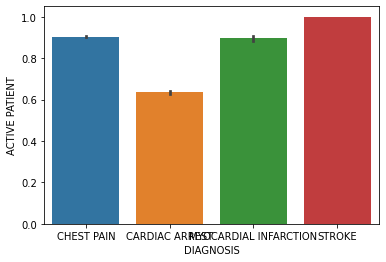

In [494]:
sns.barplot(x = 'DIAGNOSIS', y = 'ACTIVE PATIENT', data = df)

In [495]:
df[['INSURANCE', 'ACTIVE PATIENT']].groupby(['INSURANCE']).mean()

,ACTIVE PATIENT
INSURANCE,
Government,0.117216
Medicaid,0.966569
Medicare,0.837662
Private,0.838388
Self Pay,0.000000


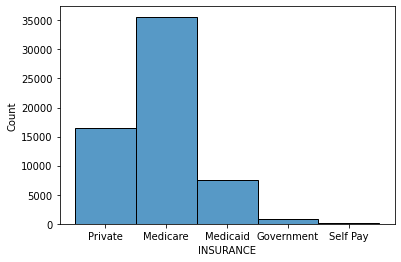

In [496]:
sns.histplot(x = 'INSURANCE', data = df)

In [497]:
df[['ADMISSION_LOCATION', 'ACTIVE PATIENT']].groupby(['ADMISSION_LOCATION']).mean() 

,ACTIVE PATIENT
ADMISSION_LOCATION,
CLINIC REFERRAL/PREMATURE,0.836671
EMERGENCY ROOM ADMIT,0.851892
PHYS REFERRAL/NORMAL DELI,1.000000
TRANSFER FROM HOSP/EXTRAM,0.779476
TRANSFER FROM SKILLED NUR,1.000000


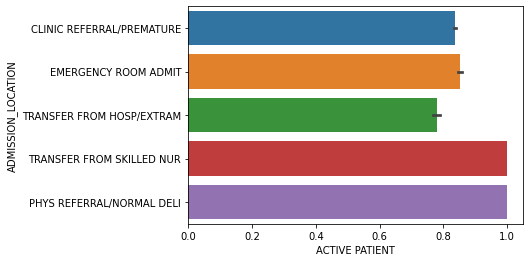

In [498]:
sns.barplot(x = 'ACTIVE PATIENT', y = 'ADMISSION_LOCATION', data = df)

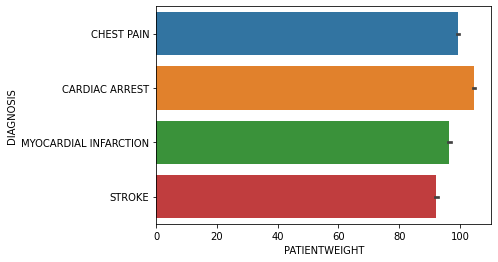

In [499]:
sns.barplot(x = 'PATIENTWEIGHT', y = 'DIAGNOSIS', data = df)

In [500]:
df[['DIAGNOSIS', 'PATIENTWEIGHT']].groupby(['DIAGNOSIS']).mean()

,PATIENTWEIGHT
DIAGNOSIS,
CARDIAC ARREST,104.697091
CHEST PAIN,99.399585
MYOCARDIAL INFARCTION,96.505957
STROKE,92.253942


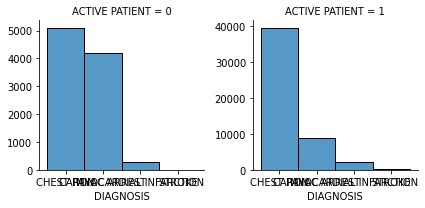

In [501]:
g = sns.FacetGrid(df, col = 'ACTIVE PATIENT', sharey = False)
g.map(sns.histplot, 'DIAGNOSIS', bins = 20) 

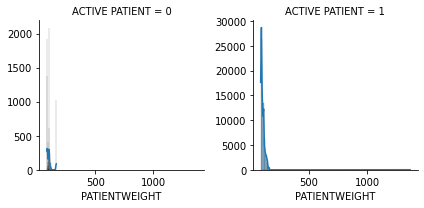

In [502]:
g = sns.FacetGrid(df, col = 'ACTIVE PATIENT', sharey = False)
g.map(sns.histplot, 'PATIENTWEIGHT', bins = 100, kde = True) 

In [503]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, plot_confusion_matrix, plot_roc_curve, mean_squared_error, r2_score

In [504]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60578 entries, 0 to 60577
Data columns (total 45 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ROW_ID                                        60578 non-null  int64  
 1   SUBJECT_ID                                    60578 non-null  int64  
 2   GENDER                                        60578 non-null  object 
 3   DOB                                           60578 non-null  object 
 4   HADM_ID                                       60578 non-null  int64  
 5   PATIENTWEIGHT                                 60578 non-null  float64
 6   DIAGNOSIS                                     60578 non-null  object 
 7   ADMITTIME                                     60578 non-null  object 
 8   DISCHTIME                                     60578 non-null  object 
 9   ADMISSION_LOCATION                            60578 non-null 

In [505]:
df.columns

Index(['ROW_ID', 'SUBJECT_ID', 'GENDER', 'DOB', 'HADM_ID', 'PATIENTWEIGHT',
       'DIAGNOSIS', 'ADMITTIME', 'DISCHTIME', 'ADMISSION_LOCATION',
       'DEATHTIME', 'DISCHARGE_LOCATION', 'INSURANCE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'EDOUTTIME', 'AGE', 'ACTIVE PATIENT',
       'DIAGNOSIS_CARDIAC ARREST', 'DIAGNOSIS_CHEST PAIN',
       'DIAGNOSIS_MYOCARDIAL INFARCTION', 'DIAGNOSIS_STROKE',
       'INSURANCE_Medicare', 'INSURANCE_Private', 'INSURANCE_Medicaid',
       'INSURANCE_OTHERS', 'RELIGION_CATHOLIC', 'RELIGION_PROTESTANT QUAKER',
       'RELIGION_NOT SPECIFIED', 'RELIGION_OTHERS',
       'ADMISSION_LOCATION_CLINIC REFERRAL/PREMATURE',
       'ADMISSION_LOCATION_EMERGENCY ROOM ADMIT',
       'ADMISSION_LOCATION_PHYS REFERRAL/NORMAL DELI',
       'ADMISSION_LOCATION_TRANSFER FROM HOSP/EXTRAM',
       'ADMISSION_LOCATION_TRANSFER FROM SKILLED NUR', 'GENDER_F',
       'DISCHARGE_LOCATION_HOME HEALTH CARE', 'DISCHARGE_LOCATION_HOME',
       'DISCHARGE_LOCATION_DEAD/EXP

In [506]:
df.head()

,ROW_ID,SUBJECT_ID,GENDER,DOB,HADM_ID,PATIENTWEIGHT,DIAGNOSIS,ADMITTIME,DISCHTIME,ADMISSION_LOCATION,DEATHTIME,DISCHARGE_LOCATION,INSURANCE,RELIGION,MARITAL_STATUS,ETHNICITY,EDOUTTIME,AGE,ACTIVE PATIENT,DIAGNOSIS_CARDIAC ARREST,DIAGNOSIS_CHEST PAIN,DIAGNOSIS_MYOCARDIAL INFARCTION,DIAGNOSIS_STROKE,INSURANCE_Medicare,INSURANCE_Private,INSURANCE_Medicaid,INSURANCE_OTHERS,RELIGION_CATHOLIC,RELIGION_PROTESTANT QUAKER,RELIGION_NOT SPECIFIED,RELIGION_OTHERS,ADMISSION_LOCATION_CLINIC REFERRAL/PREMATURE,ADMISSION_LOCATION_EMERGENCY ROOM ADMIT,ADMISSION_LOCATION_PHYS REFERRAL/NORMAL DELI,ADMISSION_LOCATION_TRANSFER FROM HOSP/EXTRAM,ADMISSION_LOCATION_TRANSFER FROM SKILLED NUR,GENDER_F,DISCHARGE_LOCATION_HOME HEALTH CARE,DISCHARGE_LOCATION_HOME,DISCHARGE_LOCATION_DEAD/EXPIRED,DISCHARGE_LOCATION_OTHERS,ETHNICITY_WHITE,ETHNICITY_BLACK/AFRICAN AMERICAN,ETHNICITY_OTHER,ETHNICITY_OTHERS
0,1997208,74821,M,2108-04-25,146804,1370.0,CHEST PAIN,2141-09-29 15:25:00,2141-10-04 10:30:00,CLINIC REFERRAL/PREMATURE,ACTIVE,REHAB/DISTINCT PART HOSP,Private,CATHOLIC,MARRIED,WHITE,2141-09-29 16:32:00,33,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0
1,1997215,74821,M,2108-04-25,146804,1370.0,CHEST PAIN,2141-09-29 15:25:00,2141-10-04 10:30:00,CLINIC REFERRAL/PREMATURE,ACTIVE,REHAB/DISTINCT PART HOSP,Private,CATHOLIC,MARRIED,WHITE,2141-09-29 16:32:00,33,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0
2,1997213,74821,M,2108-04-25,146804,1370.0,CHEST PAIN,2141-09-29 15:25:00,2141-10-04 10:30:00,CLINIC REFERRAL/PREMATURE,ACTIVE,REHAB/DISTINCT PART HOSP,Private,CATHOLIC,MARRIED,WHITE,2141-09-29 16:32:00,33,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0
3,1997209,74821,M,2108-04-25,146804,1370.0,CHEST PAIN,2141-09-29 15:25:00,2141-10-04 10:30:00,CLINIC REFERRAL/PREMATURE,ACTIVE,REHAB/DISTINCT PART HOSP,Private,CATHOLIC,MARRIED,WHITE,2141-09-29 16:32:00,33,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0
4,1997212,74821,M,2108-04-25,146804,1370.0,CHEST PAIN,2141-09-29 15:25:00,2141-10-04 10:30:00,CLINIC REFERRAL/PREMATURE,ACTIVE,REHAB/DISTINCT PART HOSP,Private,CATHOLIC,MARRIED,WHITE,2141-09-29 16:32:00,33,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0


In [507]:
tmp_categories = list(df['MARITAL_STATUS'].value_counts()[:3].keys()) + ['OTHERS'] 

tmp_categories_dtype = pd.CategoricalDtype(tmp_categories)

tmp_MARITAL_STATUS = df['MARITAL_STATUS'].astype(tmp_categories_dtype).fillna('OTHERS')
tmp_MARITAL_STATUS = pd.get_dummies(tmp_MARITAL_STATUS, prefix = 'MARITAL_STATUS') 

df = pd.concat([df, tmp_MARITAL_STATUS], axis = 1) 

tmp_MARITAL_STATUS

,MARITAL_STATUS_MARRIED,MARITAL_STATUS_SINGLE,MARITAL_STATUS_WIDOWED,MARITAL_STATUS_OTHERS
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
60573,0,1,0,0
60574,0,1,0,0
60575,0,1,0,0
60576,0,1,0,0


In [508]:
features_list = ['PATIENTWEIGHT', 'AGE', 'DIAGNOSIS_CARDIAC ARREST', 
       'DIAGNOSIS_CHEST PAIN', 'DIAGNOSIS_MYOCARDIAL INFARCTION', 'DIAGNOSIS_STROKE',
       'INSURANCE_Medicare', 'INSURANCE_Private', 'INSURANCE_Medicaid',
       'INSURANCE_OTHERS', 'ADMISSION_LOCATION_CLINIC REFERRAL/PREMATURE',
       'ADMISSION_LOCATION_EMERGENCY ROOM ADMIT',
       'ADMISSION_LOCATION_PHYS REFERRAL/NORMAL DELI',
       'ADMISSION_LOCATION_TRANSFER FROM HOSP/EXTRAM',
       'ADMISSION_LOCATION_TRANSFER FROM SKILLED NUR', 'GENDER_F',
       'ETHNICITY_WHITE', 'ETHNICITY_BLACK/AFRICAN AMERICAN',
       'ETHNICITY_OTHER', 'ETHNICITY_OTHERS']

len(features_list)

20

In [509]:
X = df[features_list]
y = df['ACTIVE PATIENT']

In [510]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y)     

In [511]:
X_train.shape

(48462, 20)

In [512]:
X_test.shape

(12116, 20)

In [513]:
model_rf1 = RandomForestClassifier(n_estimators = 200, 
                                   random_state = 1,
                                   n_jobs = -1)

In [514]:
model_rf1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [515]:
y_pred_rf1 = model_rf1.predict(X_test)

In [516]:
print(classification_report(y_test, y_pred_rf1))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1913
           1       0.99      1.00      0.99     10203

    accuracy                           0.98     12116
   macro avg       0.98      0.96      0.97     12116
weighted avg       0.98      0.98      0.98     12116



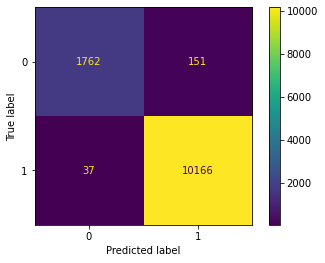

In [517]:
plot_confusion_matrix(model_rf1, X_test, y_test, values_format = 'd')
plt.show()

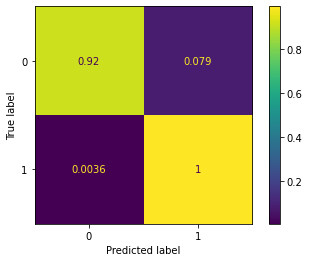

In [518]:
plot_confusion_matrix(model_rf1, X_test, y_test, normalize = 'true')
plt.show()

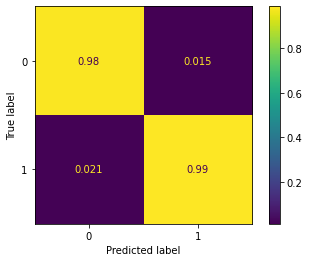

In [519]:
plot_confusion_matrix(model_rf1, X_test, y_test, normalize = 'pred') 
plt.show()

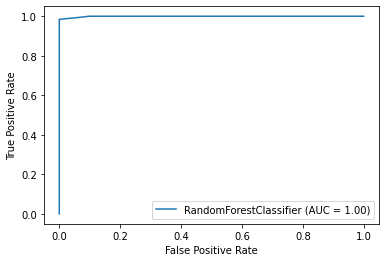

In [520]:
plot_roc_curve(model_rf1, X_test, y_test)